# **K-means Clustering**

## **Pengertian K-means**
**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok *(cluster)* berdasarkan kemiripan karakteristiknya. Tujuan utamanya adalah meminimalkan variasi dalam setiap cluster dan memaksimalkan perbedaan antar cluster.

## **Proses K-Means Clustering**

1. Pilih jumlah cluster (K) yang diinginkan.

2. Inisialisasi centroid awal secara acak (titik pusat cluster).

3. Hitung jarak setiap data ke semua centroid (biasanya pakai jarak Euclidean).

4. Kelompokkan data ke cluster dengan centroid terdekat.

5. Update centroid baru (rata-rata dari semua data dalam cluster).

6. Ulangi langkah 3–5 sampai centroid stabil (tidak berubah lagi).

## **Cara Kerja K-Means**
1. **Tentukan Jumlah Cluster (K):**

 - Misal mau bagi data jadi 3 kelompok, maka K=3.

2. **Pilih Titik Pusat Awal (Centroid):**

 - Acak 3 titik data sebagai "pusat" awal cluster (bisa juga pilih manual).

3. **Hitung Jarak & Kelompokkan:**

 - Setiap data dihitung jaraknya ke 3 centroid.

 - Data dimasukkan ke cluster dengan centroid terdekat.
(Pakai rumus jarak Euclidean: √[(x₁-x₂)² + (y₁-y₂)²])

4. **Update Posisi Centroid:**

 - Hitung ulang centroid baru (rata-rata koordinat semua data dalam cluster).
Contoh: Centroid baru = (rata-rata x semua data, rata-rata y semua data).

5. **Ulangi sampai Stabil:**

 - Kembali ke langkah 3, sampai centroid tidak bergeser lagi (atau hampir tidak berubah).



# **Keunggulan dan Kelemahan**

## **Keunggulan K-Means:**
1. **Cepat dan Efisien**

 - Cocok untuk dataset besar karena kompleksitas komputasinya rendah (O(n)).

 - Lebih cepat dibanding algoritma clustering lain (seperti Hierarchical Clustering).

2. **Mudah Diimplementasikan**

 - Algoritma sederhana dengan langkah yang jelas (hitung jarak, update centroid, ulangi).

 - Banyak library siap pakai (Scikit-learn, MATLAB, dll.).

3. **Hasil Mudah Ditafsirkan**

 - Cluster berbentuk spherical (bulat) dan padat, sehingga mudah divisualisasikan.

4. **Dapat Dikustomisasi**

 - Bisa digabung dengan teknik lain (misal: PCA untuk reduksi dimensi sebelum clustering).

## **Kelemahan K-Means:**
1. **Harus Tentukan K (Jumlah Cluster) di Awal**

 - Jika K tidak tepat, hasil bisa tidak optimal. Butuh metode tambahan (seperti Elbow Method, Silhouette Analysis) untuk memilih K.

2. **Sensitif terhadap Centroid Awal**

 - Inisialisasi centroid acak bisa menghasilkan cluster berbeda tiap percobaan (local optima).

 - Solusi: Pakai K-Means++ untuk inisialisasi lebih baik.

3. **Hanya Cocok untuk Data "Bulat" dan Ukuran Seragam**

- Buruk untuk data:

 - Berbentuk tidak teratur (seperti bulan sabit).

 - Memiliki kepadatan berbeda.

 - Memiliki outliers (centroid bisa tertarik ke data ekstrem).

4. **Bergantung pada Jarak Euclidean**

 - Kurang efektif untuk data kategori atau dimensi tinggi (curse of dimensionality).

5. **Tidak Ada Garansi Konvergen ke Solusi Global**

 - Hasil akhir mungkin hanya local optimum (tergantung inisialisasi awal)

## **Contoh Penerapan**
1. **Pengelompokan Dokumen**
- Analisis sentimen berdasarkan topik
2. **Analisis Citra**
- Kompresi warna gambar

## **Notasi Matematis**


Dataset 𝒳 = {x₁, x₂, ..., xₙ}, xᵢ ∈ ℝᵈ

Tujuan: Minimalkan SSE atau Inertia
$J = \sum_{j=1}^k \sum_{x_i \in C_j} \|x_i - \mu_j\|^2$

dengan:

Cⱼ    = cluster ke-j

μⱼ    = centroid cluster Cⱼ

‖xᵢ - μⱼ‖ = norma Euclidean




# **Implementasi K-Means Menggunakan Dataset Iris**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load data
data = pd.read_csv('/content/default_iris_combined.csv')

# Hapus kolom id dan class
X = data.drop(['id', 'class'], axis=1)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data setelah Standarisasi:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Data setelah Standarisasi:
   petal length  petal width  sepal length  sepal width
0     -1.341272    -1.312977     -0.900681     1.032057
1     -1.341272    -1.312977     -1.143017    -0.124958
2     -1.398138    -1.312977     -1.385353     0.337848
3     -1.284407    -1.312977     -1.506521     0.106445
4     -1.341272    -1.312977     -1.021849     1.263460


**Penjelasan:**

- Kita memuat dataset Iris dan menghapus kolom ‘id’ dan ‘class’ karena tidak diperlukan untuk klastering.

- Data kemudian distandardisasi menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang sama.

## **Menentukan Jumlah Klaster Optimal**

Metode Elbow

In [4]:
# Inisialisasi list untuk menyimpan metrik
sse = []
silhouette_scores = []
k_values = range(2, 5)  # k=2,3,4

# Hitung SSE dan Silhouette untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    sse.append(kmeans.inertia_)  # SSE (Inertia)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Tampilkan dalam tabel
metrics_table = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'SSE (Inertia)': sse,
    'Silhouette Score': silhouette_scores
})

print("\nPerbandingan Metrik Klastering:")
print(tabulate(metrics_table, headers='keys', tablefmt='grid', showindex=False))


Perbandingan Metrik Klastering:
+--------------------------+-----------------+--------------------+
|   Number of Clusters (k) |   SSE (Inertia) |   Silhouette Score |
+==========================+=================+====================+
|                        2 |         223.732 |           0.580184 |
+--------------------------+-----------------+--------------------+
|                        3 |         140.966 |           0.458972 |
+--------------------------+-----------------+--------------------+
|                        4 |         114.618 |           0.385285 |
+--------------------------+-----------------+--------------------+


**Penjelasan:**

- SSE (Inertia):
 - Semakin besar k, semakin kecil SSE (k=2 → SSE tertinggi, k=4 → terendah).

 - Penurunan SSE signifikan dari k=2 ke k=3, menunjukkan penambahan klaster memberikan perbaikan.

- Silhouette Score:

 - Tertinggi di k=2 (0.52), kemudian menurun seiring pertambahan k.

 - Nilai >0.5 (k=2) menunjukkan struktur klaster kuat, sedangkan k=3 (~0.46) masih cukup baik.

- Kesimpulan Optimal k:

 - k=3 bisa menjadi pilihan karena:
 -
SSE turun drastis dibanding k=2 (efisiensi klaster meningkat).

 - Silhouette Score masih relatif baik (~0.46), meski tidak sebaik k=2.

Jika prioritas adalah pemisahan klaster jelas, k=2 lebih unggul.

## **Visualisasi metode elbow**

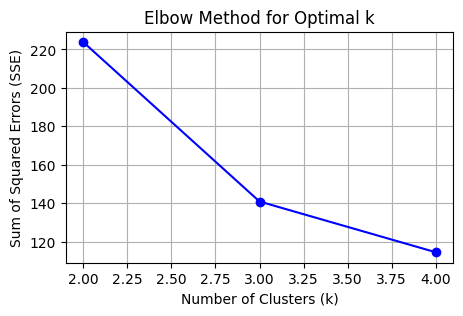

In [5]:
plt.figure(figsize=(5, 3))
plt.plot(k_values, sse, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

1. “Elbow” (titik siku) terlihat di k=3, di mana penurunan SSE mulai melambat.

2. k=3 adalah kandidat terbaik untuk jumlah klaster.

## **Visualisasi Klaster Terbaik**


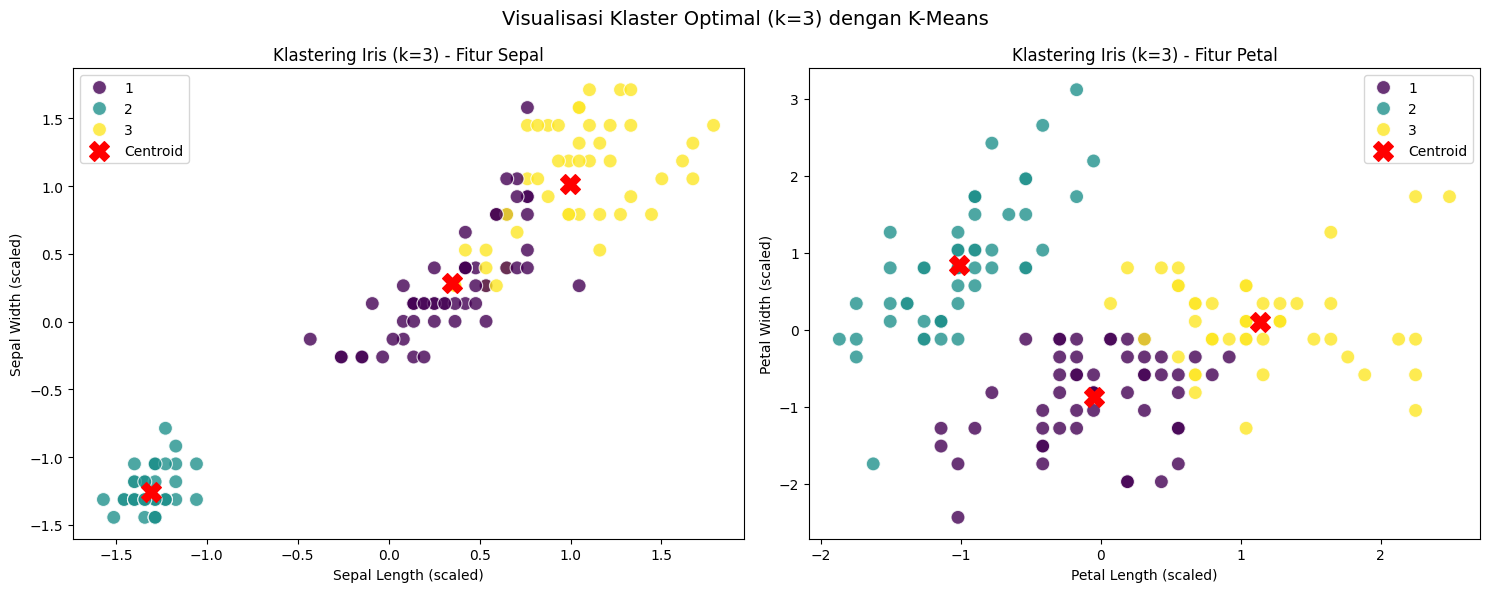

In [6]:
import seaborn as sns

# 1. Klastering dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_ + 1

# 2. Visualisasi 2 Pasang Fitur (Sepal vs Petal)
plt.figure(figsize=(15, 6))

# --- Plot 1: Sepal Length vs Sepal Width ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Sepal")
plt.legend()

# --- Plot 2: Petal Length vs Petal Width ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_scaled[:, 2], y=X_scaled[:, 3],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Petal")
plt.legend()

plt.suptitle("Visualisasi Klaster Optimal (k=3) dengan K-Means", fontsize=14)
plt.tight_layout()
plt.show()